<a href="https://colab.research.google.com/github/paolofullone/DS_Paolo/blob/main/Covid_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este projeto tem objetivo de analisar os dados de Vacinas, Internados, Novos Casos, Óbitos relacionados a Covid na região do vale do aço com os dados oficiais do governo de mg, disponíveis no site: https://coronavirus.saude.mg.gov.br

* Embora não seja o objetivo, pode ser feito para qualquer região de MG alterando uma linha de código.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
from datetime import date
import os
%matplotlib inline

In [2]:
# Lendo os arquivos

xls_painel = pd.ExcelFile('/content/drive/MyDrive/CienciaDados/Covid/xlsx_painel.xlsx')
df_confirmados = pd.read_excel(xls_painel, 'CONFIRMADOS')
df_obitos = pd.read_excel(xls_painel, 'OBITOS')
df_recuperados = pd.read_excel(xls_painel, 'RECUPERADOS')
df_internados = pd.read_excel(xls_painel, 'INTERNADOS')

In [3]:
df_vacina = pd.read_excel('/content/drive/MyDrive/CienciaDados/Covid/xlsx_vacinas.xlsx')

# Após analisar os dados, alguns ajustes são necessários.

In [4]:
# Alguns datasets vieram com Data e outros DATA, alguns Macro e outros MACRO

# Vamos criar uma lista de DFs para iterar.
lista_df = [df_confirmados, df_obitos, df_recuperados, df_internados, df_vacina]

# Não consegui iterar a modificação de deixar apenas a região vale do aço nos DF's, li alguns artigos no Stack sugerindo evitar essa situação com loop.

# Macro Região selecionada Vale do Aço.
macro_sel='VALE DO ACO'

for i in lista_df:
  i.rename(columns={'Data': 'DATA', 'Macro': 'MACRO'}, inplace=True)
  i['MACRO'] = i['MACRO'].str.replace('VALE DO AÇO', 'VALE DO ACO')
#  i = i.loc[i['MACRO'] == 'VALE DO ACO']
#  i = i[i.MACRO=='VALE DO ACO']
  pass

df_confirmados = df_confirmados[df_confirmados.MACRO==macro_sel]
df_obitos = df_obitos[df_obitos.MACRO==macro_sel] 
df_recuperados = df_recuperados[df_recuperados.MACRO==macro_sel] 
df_internados = df_internados[df_internados.MACRO==macro_sel]
df_vacina = df_vacina[df_vacina.MACRO==macro_sel] 
  

# df_confirmados = df_confirmados.loc[df_confirmados['MACRO'] == 'VALE DO ACO'] # assim também funciona.

In [5]:
# Salvando os dataframes para consulta e manipulação no Orange Data Frame.
import os

folderpath = "/content/drive/MyDrive/CienciaDados/Covid/"
for i, df in enumerate(lista_df, 1):
    filename = "df_{}".format(i)
    filepath = os.path.join(folderpath, filename)
    df.to_csv(filepath)

In [6]:
df_confirmados.head()

,MUNICIPIO_RESIDENCIA,NUM_CASOS,DATA,CodigoIBGE,URS,Micro,MACRO
0,IPATINGA,1,2020-03-04,313130.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
5,CORONEL FABRICIANO,1,2020-03-16,311940.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
27,TIMOTEO,1,2020-03-21,316870.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
43,TIMOTEO,1,2020-03-23,316870.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
128,SANTANA DO PARAISO,1,2020-04-01,315895.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [7]:
df_obitos.head()

,MUNICIPIO_RESIDENCIA,NUM_OBITOS,DATA,CodigoIBGE,URS,Micro,MACRO
1,ACUCENA,0,2020-03-19,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
15,BELO ORIENTE,0,2020-03-19,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
21,BOM JESUS DO GALHO,0,2020-03-19,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
35,CARATINGA,0,2020-03-19,311340.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
44,CORONEL FABRICIANO,0,2020-03-19,311940.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO


In [8]:
df_recuperados.head()

,MUNICIPIO_RESIDENCIA,NUM_RECUPERADOS,DATA,CodigoIBGE,URS,Micro,MACRO
4,ACUCENA,0,2020-03-23,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
32,ANTONIO DIAS,0,2020-03-23,310300.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
66,BELO ORIENTE,0,2020-03-23,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
82,BOM JESUS DO GALHO,0,2020-03-23,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
94,BRAUNAS,0,2020-03-23,310880.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [9]:
df_internados.head()

,MUNICIPIO_RESIDENCIA,NUM_INTERNADOS,DATA,CodigoIBGE,URS,Micro,MACRO
4,ACUCENA,0,2020-03-23,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
32,ANTONIO DIAS,0,2020-03-23,310300.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
66,BELO ORIENTE,0,2020-03-23,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
82,BOM JESUS DO GALHO,0,2020-03-23,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
94,BRAUNAS,0,2020-03-23,310880.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [10]:
df_vacina.head()

,MUNICIPIO_RESIDENCIA,URS,MICRO,MACRO,CodigoIBGE,DATA,Grupo,Dose,Doses Aplicadas,Unnamed: 9
4,Açucena,Coronel Fabriciano,IPATINGA,VALE DO ACO,310050,2021-01-25,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0,NaN
32,Antônio Dias,Coronel Fabriciano,CORONEL FABRICIANO/TIMÓTEO,VALE DO ACO,310300,2021-01-25,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0,NaN
66,Belo Oriente,Coronel Fabriciano,IPATINGA,VALE DO ACO,310630,2021-01-25,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0,NaN
82,Bom Jesus do Galho,Coronel Fabriciano,CARATINGA,VALE DO ACO,310780,2021-01-25,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0,NaN
94,Braúnas,Coronel Fabriciano,IPATINGA,VALE DO ACO,310880,2021-01-25,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0,NaN


In [11]:
df_vacina.drop(columns='Unnamed: 9', inplace=True)
# O arquivo excel no momento em que o código foi gerado tem um número '3113' na linha 513508 na nona coluna. Decidi dropar pois não faz sentido.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Datas:
* Dataset de casos confirmados começa em **04/03/2020**
* Dataset de ótibos começa em **19/03/2020**
* Dataset de Vacina começa em **25/01/2021**

* **Vamos trabalhar com alguns periodos de dias para geração de gráficos.**

Obs: Li os demais datasets (internados, recuperados) mas no momento não vou trabalhar estes dados.

In [12]:
min(df_confirmados['DATA']), max(df_confirmados['DATA'])

(Timestamp('2020-03-04 00:00:00'), Timestamp('2021-04-05 00:00:00'))

In [13]:
min(df_recuperados['DATA']), max(df_recuperados['DATA'])

(Timestamp('2020-03-23 00:00:00'), Timestamp('2021-04-05 00:00:00'))

In [14]:
min(df_obitos['DATA']), max(df_obitos['DATA'])

(Timestamp('2020-03-19 00:00:00'), Timestamp('2021-04-05 00:00:00'))

In [15]:
min(df_vacina['DATA']), max(df_vacina['DATA'])

(Timestamp('2021-01-25 00:00:00'), Timestamp('2021-04-01 00:00:00'))

In [16]:
min(df_internados['DATA']), max(df_internados['DATA'])

(Timestamp('2020-03-23 00:00:00'), Timestamp('2021-04-05 00:00:00'))

# Definindo quantos dias de dados queremos examinar.

In [17]:
days=('30day')

In [18]:
df_confirmados = df_confirmados[df_confirmados.DATA > datetime.datetime.now() - pd.to_timedelta(days)]

In [19]:
df_recuperados = df_recuperados[df_recuperados.DATA > datetime.datetime.now() - pd.to_timedelta(days)]

In [20]:
df_obitos = df_obitos[df_obitos.DATA > datetime.datetime.now() - pd.to_timedelta(days)]

In [21]:
df_vacina = df_vacina[df_vacina.DATA > datetime.datetime.now() - pd.to_timedelta(days)]

In [22]:
df_internados = df_internados[df_internados.DATA > datetime.datetime.now() - pd.to_timedelta(days)]

# Análise Exploratória dos Dados:

In [23]:
df_confirmados.head()

,MUNICIPIO_RESIDENCIA,NUM_CASOS,DATA,CodigoIBGE,URS,Micro,MACRO
212335,ACUCENA,0,2021-03-08,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
212363,ANTONIO DIAS,0,2021-03-08,310300.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
212397,BELO ORIENTE,0,2021-03-08,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
212413,BOM JESUS DO GALHO,0,2021-03-08,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
212425,BRAUNAS,0,2021-03-08,310880.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [24]:
df_obitos.head()

,MUNICIPIO_RESIDENCIA,NUM_OBITOS,DATA,CodigoIBGE,URS,Micro,MACRO
236986,ACUCENA,0,2021-03-08,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
237014,ANTONIO DIAS,0,2021-03-08,310300.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
237048,BELO ORIENTE,0,2021-03-08,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
237064,BOM JESUS DO GALHO,0,2021-03-08,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
237076,BRAUNAS,0,2021-03-08,310880.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [25]:
df_vacina.head()

,MUNICIPIO_RESIDENCIA,URS,MICRO,MACRO,CodigoIBGE,DATA,Grupo,Dose,Doses Aplicadas
406032,Açucena,Coronel Fabriciano,IPATINGA,VALE DO ACO,310050,2021-03-08,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,2
406060,Antônio Dias,Coronel Fabriciano,CORONEL FABRICIANO/TIMÓTEO,VALE DO ACO,310300,2021-03-08,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0
406094,Belo Oriente,Coronel Fabriciano,IPATINGA,VALE DO ACO,310630,2021-03-08,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0
406110,Bom Jesus do Galho,Coronel Fabriciano,CARATINGA,VALE DO ACO,310780,2021-03-08,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0
406122,Braúnas,Coronel Fabriciano,IPATINGA,VALE DO ACO,310880,2021-03-08,INDÍGENAS ALDEADOS,PRIMEIRA DOSE,0


In [26]:
df_internados.head()

,MUNICIPIO_RESIDENCIA,NUM_INTERNADOS,DATA,CodigoIBGE,URS,Micro,MACRO
298904,ACUCENA,24,2021-03-08,310050.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
298932,ANTONIO DIAS,18,2021-03-08,310300.0,CORONEL FABRICIANO,CORONEL FABRICIANO/TIMOTEO,VALE DO ACO
298966,BELO ORIENTE,116,2021-03-08,310630.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO
298982,BOM JESUS DO GALHO,25,2021-03-08,310780.0,CORONEL FABRICIANO,CARATINGA,VALE DO ACO
298994,BRAUNAS,10,2021-03-08,310880.0,CORONEL FABRICIANO,IPATINGA,VALE DO ACO


In [27]:
df_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 212335 to 237085
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MUNICIPIO_RESIDENCIA  1015 non-null   object        
 1   NUM_CASOS             1015 non-null   int64         
 2   DATA                  1015 non-null   datetime64[ns]
 3   CodigoIBGE            1015 non-null   float64       
 4   URS                   1015 non-null   object        
 5   Micro                 1015 non-null   object        
 6   MACRO                 1015 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 63.4+ KB


In [28]:
df_obitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 236986 to 261736
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MUNICIPIO_RESIDENCIA  1015 non-null   object        
 1   NUM_OBITOS            1015 non-null   int64         
 2   DATA                  1015 non-null   datetime64[ns]
 3   CodigoIBGE            1015 non-null   float64       
 4   URS                   1015 non-null   object        
 5   Micro                 1015 non-null   object        
 6   MACRO                 1015 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 63.4+ KB


In [29]:
df_vacina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10850 entries, 406032 to 670446
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MUNICIPIO_RESIDENCIA  10850 non-null  object        
 1   URS                   10850 non-null  object        
 2   MICRO                 10850 non-null  object        
 3   MACRO                 10850 non-null  object        
 4   CodigoIBGE            10850 non-null  int64         
 5   DATA                  10850 non-null  datetime64[ns]
 6   Grupo                 10850 non-null  object        
 7   Dose                  10850 non-null  object        
 8   Doses Aplicadas       10850 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 847.7+ KB


In [30]:
df_internados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 298904 to 323654
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MUNICIPIO_RESIDENCIA  1015 non-null   object        
 1   NUM_INTERNADOS        1015 non-null   int64         
 2   DATA                  1015 non-null   datetime64[ns]
 3   CodigoIBGE            1015 non-null   float64       
 4   URS                   1015 non-null   object        
 5   Micro                 1015 non-null   object        
 6   MACRO                 1015 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 63.4+ KB


In [31]:
df_confirmados.describe()

,NUM_CASOS,CodigoIBGE
count,1015.000000,1015.000000
mean,14.466995,313719.771429
std,44.767916,2152.662815
min,-26.000000,310050.000000
25%,0.000000,312000.000000
50%,0.000000,313500.000000
75%,6.000000,315895.000000
max,516.000000,317115.000000


In [32]:
df_obitos.describe()

,NUM_OBITOS,CodigoIBGE
count,1015.000000,1015.000000
mean,0.249261,313719.771429
std,1.123506,2152.662815
min,-16.000000,310050.000000
25%,0.000000,312000.000000
50%,0.000000,313500.000000
75%,0.000000,315895.000000
max,16.000000,317115.000000


In [33]:
df_vacina.describe()

,CodigoIBGE,Doses Aplicadas
count,10850.000000,10850.000000
mean,313719.771429,5.515392
std,2151.701287,59.584093
min,310050.000000,-589.000000
25%,312000.000000,0.000000
50%,313500.000000,0.000000
75%,315895.000000,0.000000
max,317115.000000,2463.000000


In [34]:
df_internados.describe()

,NUM_INTERNADOS,CodigoIBGE
count,1015.000000,1015.000000
mean,133.356650,313719.771429
std,293.174812,2152.662815
min,1.000000,310050.000000
25%,18.000000,312000.000000
50%,33.000000,313500.000000
75%,64.000000,315895.000000
max,1446.000000,317115.000000


In [35]:
df_confirmados.duplicated().sum()

0

In [36]:
df_obitos.duplicated().sum()

0

In [37]:
df_vacina.duplicated().sum()

0

In [38]:
df_internados.duplicated().sum()


0

In [39]:
df_confirmados.isnull().sum()

MUNICIPIO_RESIDENCIA    0
NUM_CASOS               0
DATA                    0
CodigoIBGE              0
URS                     0
Micro                   0
MACRO                   0
dtype: int64

In [40]:
df_obitos.isnull().sum()

MUNICIPIO_RESIDENCIA    0
NUM_OBITOS              0
DATA                    0
CodigoIBGE              0
URS                     0
Micro                   0
MACRO                   0
dtype: int64

In [41]:
df_vacina.isnull().sum()

MUNICIPIO_RESIDENCIA    0
URS                     0
MICRO                   0
MACRO                   0
CodigoIBGE              0
DATA                    0
Grupo                   0
Dose                    0
Doses Aplicadas         0
dtype: int64

In [42]:
df_internados.isnull().sum()

MUNICIPIO_RESIDENCIA    0
NUM_INTERNADOS          0
DATA                    0
CodigoIBGE              0
URS                     0
Micro                   0
MACRO                   0
dtype: int64

In [43]:
set(df_confirmados['Micro'])

{'CARATINGA', 'CORONEL FABRICIANO/TIMOTEO', 'IPATINGA'}

In [44]:
set(df_obitos['Micro'])

{'CARATINGA', 'CORONEL FABRICIANO/TIMOTEO', 'IPATINGA'}

In [45]:
set(df_vacina['MICRO'])

{'CARATINGA', 'CORONEL FABRICIANO/TIMÓTEO', 'IPATINGA'}

In [46]:
set(df_internados['Micro'])

{'CARATINGA', 'CORONEL FABRICIANO/TIMOTEO', 'IPATINGA'}

# Plotando Gráficos.

In [47]:
sum_conf = df_confirmados.resample("D", on='DATA')['NUM_CASOS'].sum()
sum_conf

DATA
2021-03-08     137
2021-03-09     164
2021-03-10     436
2021-03-11     327
2021-03-12     837
2021-03-13     656
2021-03-14     241
2021-03-15     221
2021-03-16     383
2021-03-17     516
2021-03-18     542
2021-03-19     780
2021-03-20     610
2021-03-21     161
2021-03-22     158
2021-03-23     447
2021-03-24     513
2021-03-25     829
2021-03-26    1142
2021-03-27     781
2021-03-28     719
2021-03-29     300
2021-03-30     448
2021-03-31     841
2021-04-01     825
2021-04-02     614
2021-04-03     606
2021-04-04     245
2021-04-05     205
Freq: D, Name: NUM_CASOS, dtype: int64

In [48]:
sum_ob = df_obitos.resample("D", on='DATA')['NUM_OBITOS'].sum()
sum_ob

DATA
2021-03-08     0
2021-03-09     2
2021-03-10    15
2021-03-11     3
2021-03-12     6
2021-03-13     8
2021-03-14     4
2021-03-15     0
2021-03-16     1
2021-03-17     9
2021-03-18     9
2021-03-19     4
2021-03-20    16
2021-03-21     6
2021-03-22     0
2021-03-23     4
2021-03-24    12
2021-03-25     2
2021-03-26    12
2021-03-27    18
2021-03-28    22
2021-03-29     6
2021-03-30     3
2021-03-31    20
2021-04-01    28
2021-04-02    39
2021-04-03    20
2021-04-04     0
2021-04-05   -16
Freq: D, Name: NUM_OBITOS, dtype: int64

In [49]:
sum_vac = df_vacina.resample("D", on='DATA')['Doses Aplicadas'].sum()
sum_vac

DATA
2021-03-08     1512
2021-03-09     2781
2021-03-10     1183
2021-03-11     1222
2021-03-12     1731
2021-03-13        0
2021-03-14        0
2021-03-15     3707
2021-03-16     1267
2021-03-17     3712
2021-03-18     1261
2021-03-19     1233
2021-03-20        0
2021-03-21        0
2021-03-22     2860
2021-03-23     2754
2021-03-24     3514
2021-03-25     1740
2021-03-26     3116
2021-03-27        0
2021-03-28        0
2021-03-29     1435
2021-03-30     1526
2021-03-31    17613
2021-04-01     5675
Freq: D, Name: Doses Aplicadas, dtype: int64

In [50]:
sum_int = df_internados.resample("D", on='DATA')['NUM_INTERNADOS'].sum()
sum_int

DATA
2021-03-08    4086
2021-03-09    4104
2021-03-10    4168
2021-03-11    4196
2021-03-12    4229
2021-03-13    4420
2021-03-14    4430
2021-03-15    4436
2021-03-16    4468
2021-03-17    4529
2021-03-18    4557
2021-03-19    4611
2021-03-20    4667
2021-03-21    4694
2021-03-22    4719
2021-03-23    4743
2021-03-24    4782
2021-03-25    4802
2021-03-26    4842
2021-03-27    4901
2021-03-28    4925
2021-03-29    4931
2021-03-30    4938
2021-03-31    4969
2021-04-01    5029
2021-04-02    5022
2021-04-03    5039
2021-04-04    5050
2021-04-05    5070
Freq: D, Name: NUM_INTERNADOS, dtype: int64

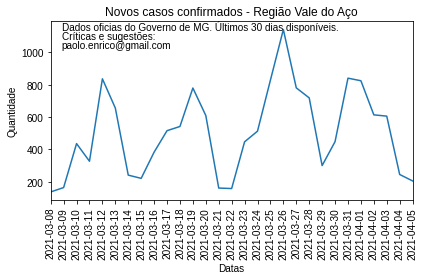

In [51]:
plt.title('Novos casos confirmados - Região Vale do Aço')
ax = sum_conf.plot(kind='line')

plt.xticks(sum_conf.index.strftime('%Y-%m-%d'), sum_conf.index.strftime('%Y-%m-%d'), rotation ='vertical')

ax.set_xlabel('Datas')
ax.set_ylabel('Quantidade')


plt.annotate('Dados oficias do Governo de MG. Últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')
plt.style.use('seaborn-white')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-confirmados.png')
plt.show()


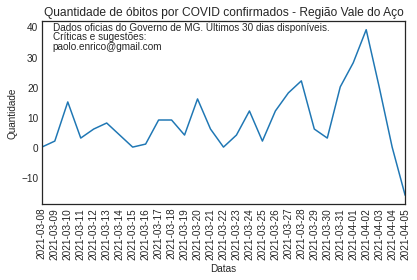

In [52]:

plt.title('Quantidade de óbitos por COVID confirmados - Região Vale do Aço')

ax = sum_ob.plot(kind='line')

plt.xticks(sum_ob.index.strftime('%Y-%m-%d'), sum_ob.index.strftime('%Y-%m-%d'), rotation ='vertical')

ax.set_xlabel('Datas')
ax.set_ylabel('Quantidade')

plt.annotate('Dados oficias do Governo de MG. Últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')
plt.style.use('seaborn-white')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-obitos.png')
plt.show()

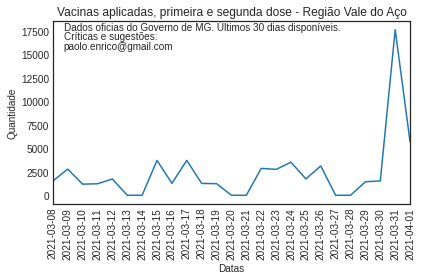

In [53]:
plt.title('Vacinas aplicadas, primeira e segunda dose - Região Vale do Aço')
ax = sum_vac.plot(kind='line')

plt.xticks(sum_vac.index.strftime('%Y-%m-%d'), sum_vac.index.strftime('%Y-%m-%d'), rotation ='vertical')

ax.set_xlabel('Datas')
ax.set_ylabel('Quantidade')


plt.annotate('Dados oficias do Governo de MG. Últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')
plt.style.use('seaborn-white')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-vacinas.png')
plt.show()


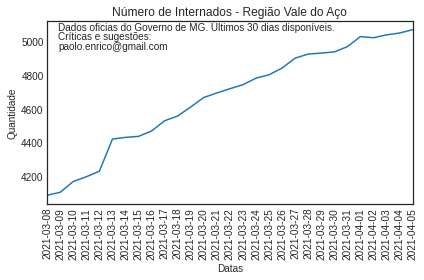

In [54]:
plt.title('Número de Internados - Região Vale do Aço')
ax = sum_int.plot(kind='line')

plt.xticks(sum_int.index.strftime('%Y-%m-%d'), sum_int.index.strftime('%Y-%m-%d'), rotation ='vertical')

ax.set_xlabel('Datas')
ax.set_ylabel('Quantidade')


plt.annotate('Dados oficias do Governo de MG. Últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')
plt.style.use('seaborn-white')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-internados.png')
plt.show()

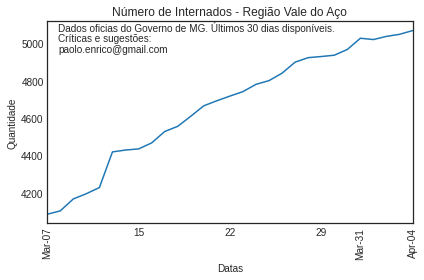

In [55]:
# Esse ficou do jeito que eu quero

import matplotlib.dates as mdates
ax = sum_int.plot(kind='line')
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation ='vertical')


ax.set_xlabel('Datas')
ax.set_ylabel('Quantidade')

plt.title('Número de Internados - Região Vale do Aço')
plt.annotate('Dados oficias do Governo de MG. Últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')
plt.style.use('seaborn-white')

plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-internados.png')
plt.show()

Text(0.5, 1.0, 'Óbitos')

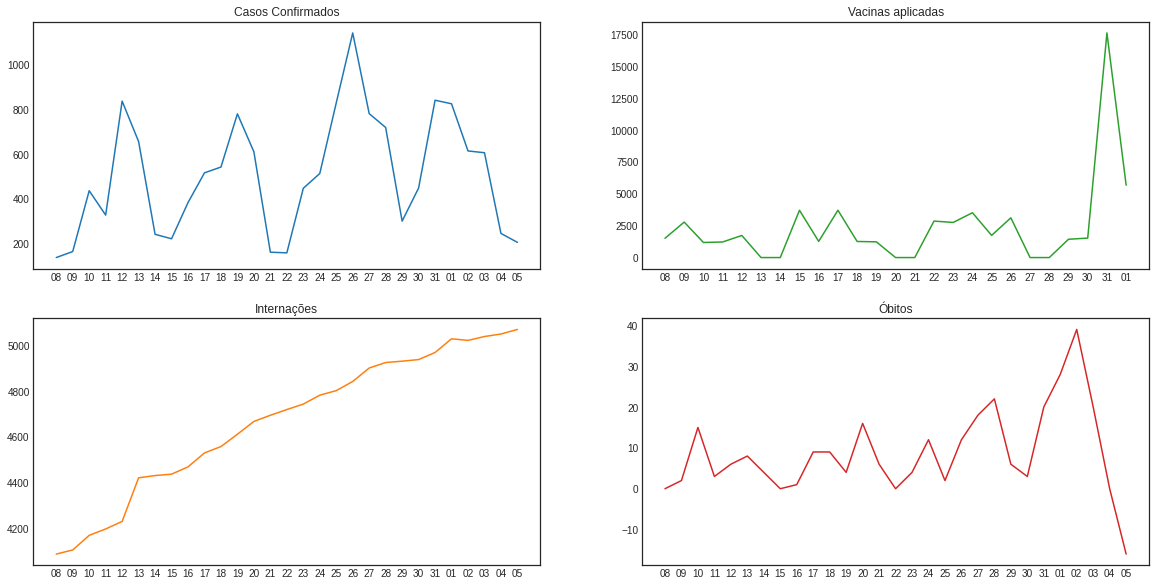

In [56]:
# sem índice do mês

plt.rcParams["figure.figsize"] = (20,10)



fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(sum_conf.index.strftime('%d'), sum_conf )
axs[0, 0].set_title('Casos Confirmados')
axs[0, 1].plot(sum_vac.index.strftime('%d'), sum_vac, 'tab:green')
axs[0, 1].set_title('Vacinas aplicadas')
axs[1, 0].plot(sum_int.index.strftime('%d'), sum_int, 'tab:orange')
axs[1, 0].set_title('Internações')
axs[1, 1].plot(sum_ob.index.strftime('%d'), sum_ob, 'tab:red')
axs[1, 1].set_title('Óbitos')

# plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid-teste.png')

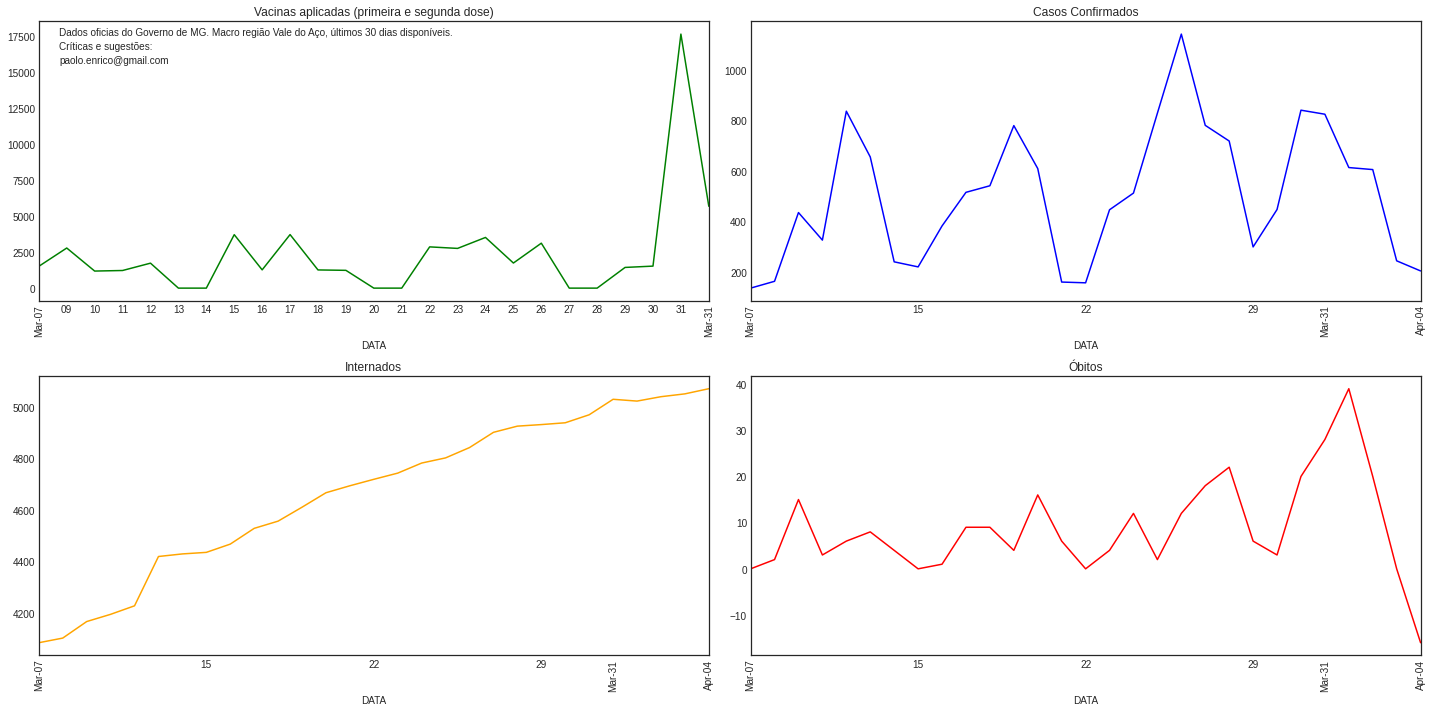

In [57]:
#com índice do mês

import matplotlib.dates as mdates

ax1 = plt.subplot(221)

plt.annotate('Dados oficias do Governo de MG. Macro região Vale do Aço, últimos 30 dias disponíveis.', xy=(0.03, 0.95), xycoords='axes fraction')
plt.annotate('Críticas e sugestões:', xy=(0.03, 0.90), xycoords='axes fraction')
plt.annotate('paolo.enrico@gmail.com', xy=(0.03, 0.85), xycoords='axes fraction')

plt.title('Vacinas aplicadas (primeira e segunda dose)')
ax = sum_vac.plot(kind='line', color='green')
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation ='vertical')


ax2 = plt.subplot(222)
plt.title('Casos Confirmados')
ax = sum_conf.plot(kind='line', color='blue')
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation ='vertical')


ax3 = plt.subplot(223)
plt.title('Internados')
ax = sum_int.plot(kind='line', color='orange')
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation ='vertical')


ax4 = plt.subplot(224)
plt.title('Óbitos')
ax = sum_ob.plot(kind='line', color='red')
myFmt = mdates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation ='vertical')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/CienciaDados/Covid/covid.png')
plt.show()